#ICP 8 Q1
##Diabetes dataset


##Dataset Analysis

In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras import layers

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#Check tensorflow version
print(tf.__version__)

2.8.0


In [ ]:
#get the dataset
dataset = pd.read_csv("/content/diabetes.csv")

In [ ]:
#Look at the head
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
#Describe the data
dataset.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Look at the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# get numpy ndarray
dataset = dataset.values

In [ ]:
#Get the shape
dataset.shape

(767, 9)

##Data Preprocessing


In [ ]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

In [ ]:
#Use test train split to get our X train/test and Y train/test
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=42)

In [ ]:
#Get copies of the raw training data before Scaling
X_train_raw = X_train
X_test_raw = X_test

In [ ]:
#fit transform our X train/test
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Get the shape to put in our model
print(X_train.shape)

(575, 8)


##Raw Model

Loss: 0.69
Accuracy: 65%

In [ ]:
model = keras.Sequential() # create model

# input dimensions are 8 from above.
model.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) #Configure the learning process

#Get the model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                288       
                                                                 
 dense_73 (Dense)            (None, 64)                2112      
                                                                 
 dense_74 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Create the Sequential Model
my_first_nn_fitted = model.fit(X_train_raw, Y_train, epochs=100, validation_data=(X_test_raw, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 3.2366 - acc: 0.5652 - val_loss: 1.3201 - val_acc: 0.6771
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 1.2522 - acc: 0.5635 - val_loss: 1.0542 - val_acc: 0.5000
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8418 - acc: 0.6070 - val_loss: 0.7901 - val_acc: 0.5781
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7187 - acc: 0.6052 - val_loss: 0.7054 - val_acc: 0.6198
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6824 - acc: 0.6678 - val_loss: 0.6776 - val_acc: 0.6719
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6317 - acc: 0.6417 - val_loss: 0.6111 - val_acc: 0.6667
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6107 - acc: 0.6730 - val_loss: 0.6193 - val_acc: 0.6927
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6374 - 

In [ ]:
#get the loss and accuracy
scores = model.evaluate(X_test_raw, Y_test)
print('Loss: {:.2}\nAccuracy: {:.2%}'.format(scores[0], scores[1]))

6/6 [==============================] - 0s 3ms/step - loss: 0.5680 - acc: 0.7448
Loss: 0.57
Accuracy: 74.48%


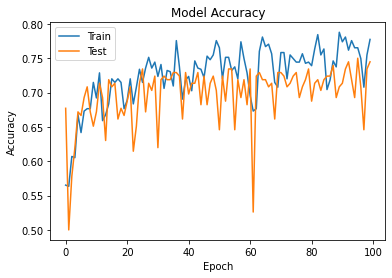

In [ ]:
# summarize history for accuracy
plt.plot(my_first_nn_fitted.history['acc'])
plt.plot(my_first_nn_fitted.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

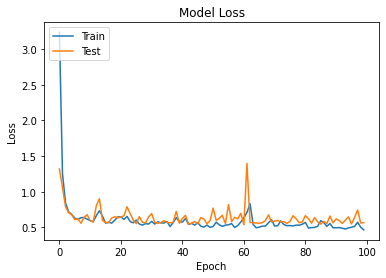

In [ ]:
# summarize history for loss
plt.plot(my_first_nn_fitted.history['loss'])
plt.plot(my_first_nn_fitted.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Normalized Model

Loss: 0.55
Accuracy: 73%

In [ ]:
model = keras.Sequential() # create model

# input dimensions are 8 from above.
model.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 32)                288       
                                                                 
 dense_76 (Dense)            (None, 64)                2112      
                                                                 
 dense_77 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_first_nn_fitted_normal = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 23ms/step - loss: 0.6660 - acc: 0.6522 - val_loss: 0.6125 - val_acc: 0.6927
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.5897 - acc: 0.7096 - val_loss: 0.5555 - val_acc: 0.7344
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5399 - acc: 0.7513 - val_loss: 0.5177 - val_acc: 0.7396
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 0.5110 - acc: 0.7600 - val_loss: 0.4937 - val_acc: 0.7656
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 0.4910 - acc: 0.7670 - val_loss: 0.4840 - val_acc: 0.7812
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 0.4790 - acc: 0.7757 - val_loss: 0.4750 - val_acc: 0.7917
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4708 - acc: 0.7826 - val_loss: 0.4696 - val_acc: 0.7760
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 0.4647

In [ ]:
#get the loss and accuracies
scores = model.evaluate(X_test, Y_test)
print('Loss: {:.2}\nAccuracy: {:.2%}'.format(scores[0], scores[1]))

6/6 [==============================] - 0s 5ms/step - loss: 0.5716 - acc: 0.7604
Loss: 0.57
Accuracy: 76.04%


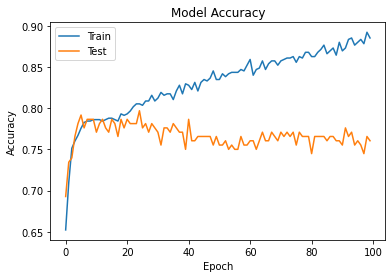

In [ ]:
# summarize history for accuracy
plt.plot(my_first_nn_fitted_normal.history['acc'])
plt.plot(my_first_nn_fitted_normal.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

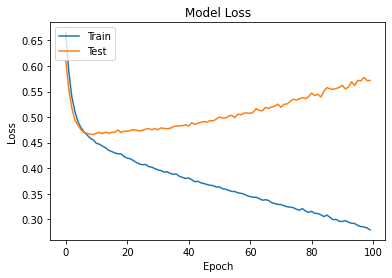

In [ ]:
# summarize history for loss
plt.plot(my_first_nn_fitted_normal.history['loss'])
plt.plot(my_first_nn_fitted_normal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Normalized Data and Extra Dense Laters Model

Loss: 1.5 Accuracy: 72%

In [ ]:
model = keras.Sequential() # create model

# input dimensions are 8 from above.
model.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(128, activation='relu')) # hidden layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 32)                288       
                                                                 
 dense_79 (Dense)            (None, 64)                2112      
                                                                 
 dense_80 (Dense)            (None, 128)               8320      
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,041
Trainable params: 19,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit the model
my_first_nn_fitted_dense = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 2s 34ms/step - loss: 0.6339 - acc: 0.6765 - val_loss: 0.5709 - val_acc: 0.7240
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5151 - acc: 0.7461 - val_loss: 0.4867 - val_acc: 0.7656
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 0.4710 - acc: 0.7739 - val_loss: 0.4568 - val_acc: 0.7656
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4569 - acc: 0.7722 - val_loss: 0.4545 - val_acc: 0.7812
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4382 - acc: 0.7878 - val_loss: 0.4551 - val_acc: 0.7865
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4279 - acc: 0.8087 - val_loss: 0.4536 - val_acc: 0.7917
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.4196 - acc: 0.8035 - val_loss: 0.4604 - val_acc: 0.7812
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 0.411

In [ ]:
#Get the loss and accuracies
scores = model.evaluate(X_test, Y_test)
print('Loss: {:.2}\nAccuracy: {:.2%}'.format(scores[0], scores[1]))

6/6 [==============================] - 0s 2ms/step - loss: 1.3586 - acc: 0.7500
Loss: 1.4
Accuracy: 75.00%


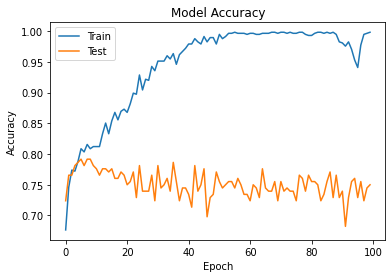

In [ ]:
# summarize history for accuracy
plt.plot(my_first_nn_fitted_dense.history['acc'])
plt.plot(my_first_nn_fitted_dense.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

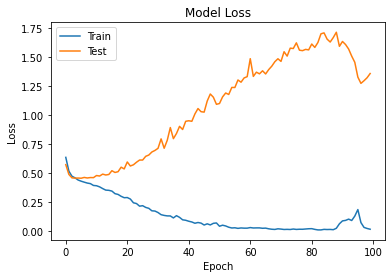

In [ ]:
# summarize history for loss
plt.plot(my_first_nn_fitted_dense.history['loss'])
plt.plot(my_first_nn_fitted_dense.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()